In [14]:
#diabetes df
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import ipywidgets
from ipywidgets import widgets as wd
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics as mt
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

In [2]:
# Loading in HTML/CSS packages for use within the notebook
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# Mini Lab: Logistic Regression and SVMs
### Group A: Mai Loan Tran, Lei Jiang, Zachary Gill, & Samantha Sprague

## Table of Contents for Mini Lab
* <a href="#CreateModels">Create Models</a>
* <a href="#ModelAdvantages">Model Advantages</a>
* <a href="#InterpretFeatureImportance">Interpret Feature Importance</a>
* <a href="#InterpretSupportVectors">Interpret Support Vectors</a>


<a id="CreateModels"></a>
## Create Models

**Requirements:** Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate.

In [3]:
directory = 'C:/githubrepo/7331_Project/data/'
df_zg = pd.read_csv(directory + 'Diabetic_Cleaned.csv')
print("Done reading data.")

Done reading data.


In [4]:
ordinal = ["age", "time_in_hospital"]
categorical = ["race", "gender", "admission_type_id", "discharge_disposition_id",
               "admission_source_id", "medical_specialty", "max_glu_serum",
               "A1Cresult", "change", "diabetesMed", "diag_1_val", "diag_2_val",
               "diag_3_val", "meds_increased"]
continuous = ["num_lab_procedures", "num_procedures", "num_medications",
              "number_outpatient", "number_emergency", "number_inpatient",
              "number_diagnoses", "medication_count"]
medicines = ["metformin", "repaglinide", "nateglinide", "chlorpropamide",
             "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
             "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone",
             "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin",
             "metformin-rosiglitazone", "metformin-pioglitazone"]
response = ["readmitted_tf"]

In [5]:
df_zg_ordinal = df_zg[ordinal]
df_zg_categorical = df_zg[categorical]
df_zg_continuous = df_zg[continuous]
df_zg_medicines = df_zg[medicines]
df_zg_response = df_zg[response]

In [6]:
# Loop that makes the age Ordinal
for i in range(0, 10):
    val = "[" + str(i*10) + "-" + str((i+1)*10) + ")"
    df_zg_ordinal.loc[df_zg_ordinal['age'] == val, 'age'] = i

In [7]:
#Make all categorical columns categorical
df_zg_categorical['admission_type_id'] = df_zg_categorical['admission_type_id'].astype(object)
df_zg_categorical['discharge_disposition_id'] = df_zg_categorical['discharge_disposition_id'].astype(object)
df_zg_categorical['admission_source_id'] = df_zg_categorical['admission_source_id'].astype(object)
df_zg_categorical['admission_type_id'] = df_zg_categorical['admission_type_id'].astype(object)
df_zg_categorical['meds_increased'] = df_zg_categorical['meds_increased'].astype(object)
print("Done")

Done


In [8]:
#Creating X and Y dataframes
df_zg_x = pd.concat([df_zg_ordinal, df_zg_categorical, df_zg_continuous], axis = 1)
df_zg_num_x = pd.concat([df_zg_ordinal, df_zg_continuous], axis = 1)
df_zg_med_x = pd.concat([df_zg_ordinal, df_zg_categorical, df_zg_continuous, df_zg_medicines], axis = 1)
df_zg_hot_x = pd.concat([df_zg_ordinal, pd.get_dummies(df_zg_categorical), df_zg_continuous], axis = 1)
df_zg_hot_med_x = pd.concat([df_zg_ordinal, pd.get_dummies(df_zg_categorical), df_zg_continuous, pd.get_dummies(df_zg_medicines)], axis = 1)
df_zg_y = df_zg_response
print("Done")

Done


In [ ]:
#df_mlt_hot = pd.concat([df_mlt_hot_x,df_mlt_y], axis=1)

### Training and Testing Split

In [10]:
#Code for Training and Testing Split

#Hot Encoded, Not Scaled, Not including meds----------------
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(df_zg_hot_x, df_zg_y, test_size = 0.2, random_state=7)
#Hot Encoded, Not Scaled, Including meds--------------------
x_train_hm, x_test_hm, y_train_hm, y_test_hm = train_test_split(df_zg_hot_med_x, df_zg_y, test_size = 0.2, random_state=7)
#Hot Encoded, Scaled, No Meds-------------------------------
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(x_train_h)
x_train_hs = scl_obj.transform(x_train_h)
x_test_hs = scl_obj.transform(x_test_h)
#Hot Encoded, Scaled, Including Meds------------------------
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(x_train_hm)
x_train_hsm = scl_obj.transform(x_train_hm)
x_test_hsm = scl_obj.transform(x_test_hm)

#Reseting the row indexes
x_train_h.reset_index()
y_train_h.reset_index()
x_train_hm.reset_index()
y_train_hm.reset_index()

x_test_h.reset_index()
y_test_h.reset_index()
x_test_hm.reset_index()
y_test_hm.reset_index()

x_train_h.shape, x_test_h.shape

C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\ipykernel

((81412, 184), (20354, 184))

## Logistic Regression Models

###### Functions for Logistic Regression

In [16]:
# A function to find the optimal cutoff point from ROC curve

#https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def Find_Optimal_Cutoff(target, predicted):
    """Parameters:
    target : Matrix with dependent or target data, where rows are observations
    predicted : Matrix with predicted data, where rows are observations
    ----------
    Return: list type, with optimal cutoff value
    """
    predicted = predicted[:,1]
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#probs is the result of a model.predict_proba(x_test) call
#This function plots an ROC curve
def rocCurvePlot(probs, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### LR 1

discharge_disposition_id_11 has weight of -5.687000885917768
discharge_disposition_id_14 has weight of -2.699368821620567
discharge_disposition_id_13 has weight of -1.7703747450584482
admission_source_id_9 has weight of -1.4291007938208673
discharge_disposition_id_19 has weight of -0.9449989327546094
medical_specialty_Surgery-Cardiovascular/Thoracic has weight of -0.9378343619786118
admission_source_id_5 has weight of -0.8252405545342675
admission_type_id_4 has weight of -0.7705486708802
glyburide-metformin_Up has weight of -0.743779349602651
admission_source_id_4 has weight of -0.7368353793573432
admission_source_id_6 has weight of -0.7263628869127727
medical_specialty_Pediatrics-Endocrinology has weight of -0.7207053685556961
admission_type_id_3 has weight of -0.7129853684983268
medical_specialty_DCPTEAM has weight of -0.6633103980188303
admission_type_id_5 has weight of -0.6605506031581062
admission_type_id_8 has weight of -0.6558423139964561
admission_source_id_2 has weight of -0.6

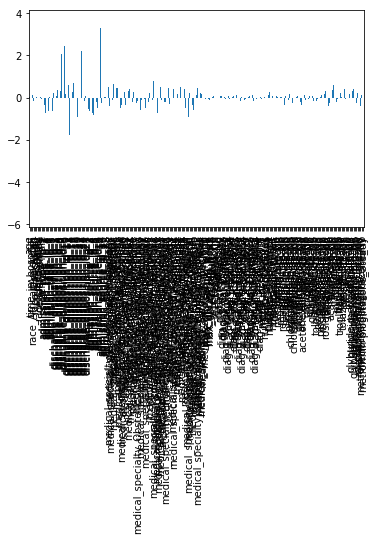

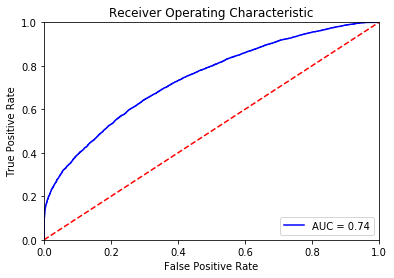

F1: 0.671507678095125 ACC: 0.6710720251547607 AUC: 0.7419343116089305 
Confusion Matrix
 [[7367 3602]
 [3093 6292]]
Wall time: 12.7 s


In [17]:
%%time
#Code fro LR 1
#Logistic Regression: Hot Encoded, Not Scaled, Not including meds
model = LogisticRegression()
model.fit(x_train_hm, y_train_hm)

#Print all of the coefficient weights
weights = model.coef_.T
variable_names = x_train_hm.columns
allWeight = zip(weights, variable_names)
allWeight = sorted(allWeight, key=lambda x: x[0])
for coef, name in allWeight:
    print(name, 'has weight of', coef[0])

#Bar plot of the coefficient weights
pd.Series(model.coef_[0].T,index=x_train_hm.columns).plot(kind = 'bar')
plt.show()

#Find the optimal cutoff point
y_pred_cut = model.predict_proba(x_train_hm)
cutoff = Find_Optimal_Cutoff(y_train_hm, y_pred_cut)

#Prediction
#y_pred = model.predict(x_test_scaled)
y_pred_probs = model.predict_proba(x_test_hm)
y_pred = np.where(y_pred_probs >= cutoff, 1, 0)
y_pred = y_pred[:,1]

rocCurvePlot(y_pred_probs, y_test_hm)

#Accuracy metrics
f1 = f1_score(y_test_hm, y_pred, average = 'weighted')
acc = accuracy_score(y_test_hm, y_pred)
roc = roc_auc_score(y_test_hm, model.predict_proba(x_test_hm)[:,1])
conf = mt.confusion_matrix(y_test_hm, y_pred)
print("F1:", f1, "ACC:", acc, "AUC:", roc, "\nConfusion Matrix\n", conf)

### LR 2

discharge_disposition_id_11 has weight of -0.21346758926435067
discharge_disposition_id_14 has weight of -0.08375231661570239
discharge_disposition_id_13 has weight of -0.07088695068967547
admission_source_id_2 has weight of -0.059977976859567406
admission_type_id_3 has weight of -0.05600606567451274
admission_type_id_4 has weight of -0.05077841025460391
medical_specialty_Surgery-Cardiovascular/Thoracic has weight of -0.04870260595772187
discharge_disposition_id_1 has weight of -0.04599185123214881
medical_specialty_InternalMedicine has weight of -0.04461155459826881
discharge_disposition_id_3 has weight of -0.03843886999925227
discharge_disposition_id_18 has weight of -0.03811447245397327
admission_source_id_1 has weight of -0.03773124756054721
medical_specialty_ObstetricsandGynecology has weight of -0.037375751107070476
medical_specialty_Orthopedics-Reconstructive has weight of -0.03638096500282559
race_Unspecified has weight of -0.034219557314110506
diabetesMed_No has weight of -0.0

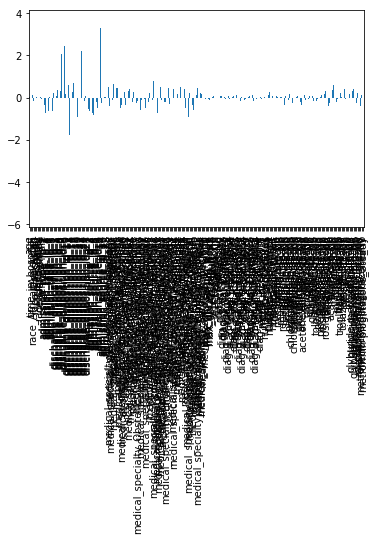

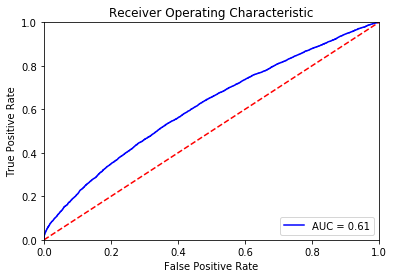

F1: 0.581444850178497 ACC: 0.5808194949395696 AUC: 0.6141867042067942 
Confusion Matrix
 [[6358 4611]
 [3921 5464]]
Wall time: 4.43 s


In [31]:
%%time
#Code for LR 2
#SGD Logistic Regression: Hot encoded, Including Medications
regularize_const = 0.1
iterations = 5
# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha = regularize_const,
        fit_intercept = True, l1_ratio = 0.0, learning_rate = 'optimal',
        loss = 'log', n_iter = iterations, n_jobs = -1, penalty = 'l2')
cv = StratifiedShuffleSplit( n_splits = 1, test_size = 0.5 )
scl = StandardScaler()
log_sgd.fit(scl.fit_transform(x_train_hm), y_train_hm)

#Print all of the coefficient weights
weights = log_sgd.coef_.T
variable_names = x_train_hm.columns
allWeight = zip(weights, variable_names)
allWeight = sorted(allWeight, key=lambda x: x[0])
for coef, name in allWeight:
    print(name, 'has weight of', coef[0])

#Bar plot of the coefficient weights
pd.Series(model.coef_[0].T,index=x_train_hm.columns).plot(kind = 'bar')
plt.show()

#Find the optimal cutoff point
y_pred_cut = log_sgd.predict_proba(x_train_hm)
cutoff = Find_Optimal_Cutoff(y_train_hm, y_pred_cut)

#Without the cutoff point changed it predicts all of one class

#Prediction
y_pred_probs = log_sgd.predict_proba(x_test_hm)
y_pred = np.where(y_pred_probs >= cutoff, 1, 0)
y_pred = y_pred[:,1]

rocCurvePlot(y_pred_probs, y_test_hm)

#Accuracy metrics
f1 = f1_score(y_test_hm, y_pred, average = 'weighted')
acc = accuracy_score(y_test_hm, y_pred)
roc = roc_auc_score(y_test_hm, log_sgd.predict_proba(x_test_hm)[:,1])
conf = mt.confusion_matrix(y_test_hm, y_pred)
print("F1:", f1, "ACC:", acc, "AUC:", roc, "\nConfusion Matrix\n", conf)

### LR 3

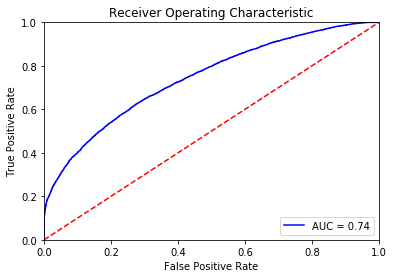

==== Iteration: 0 ====
F1: 0.6700381469546245 ACC: 0.6696472437850054 AUC: 0.7440666354981931 
Confusion Matrix
 [[7310 3609]
 [3115 6320]]


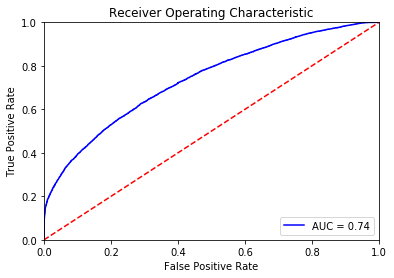

==== Iteration: 1 ====
F1: 0.6652988076040195 ACC: 0.664783334971013 AUC: 0.7369612051637187 
Confusion Matrix
 [[7235 3750]
 [3073 6296]]


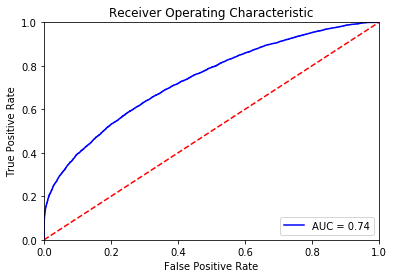

==== Iteration: 2 ====
F1: 0.6661372850640456 ACC: 0.6657659428122237 AUC: 0.7378979238922219 
Confusion Matrix
 [[7263 3637]
 [3166 6288]]
discharge_disposition_id_11 has weight of -5.432642325167301
discharge_disposition_id_14 has weight of -2.782910993004143
discharge_disposition_id_13 has weight of -1.9089851480174729
admission_source_id_9 has weight of -1.5077973119973465
discharge_disposition_id_19 has weight of -1.0957026987120022
medical_specialty_Surgery-Cardiovascular/Thoracic has weight of -0.8832774956765138
admission_source_id_5 has weight of -0.8114432721334298
admission_source_id_4 has weight of -0.7974219634909776
medical_specialty_Pediatrics-Endocrinology has weight of -0.7974071850348599
admission_type_id_4 has weight of -0.7931042366134454
admission_source_id_6 has weight of -0.7689786412208155
admission_type_id_3 has weight of -0.7191903113334459
admission_type_id_8 has weight of -0.7065559525202587
admission_type_id_5 has weight of -0.6793750991340134
admission_sou

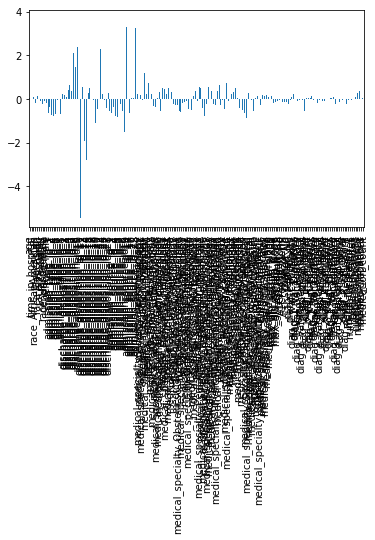

In [38]:
#Code for LR 3
df_mlt_hot = pd.concat([df_zg_hot_x, df_zg_y], axis=1)
from sklearn.model_selection import ShuffleSplit

#Converting the dataframe into a Numpy Matrix
if 'readmitted_tf' in df_mlt_hot:
    y = df_mlt_hot['readmitted_tf'].values
    del df_mlt_hot['readmitted_tf']
    X = df_mlt_hot.values
    
num_cv_iterations = 3
num_instances = len(y)
#0.2 indicates the 80/20 split
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2)

#-----------------------------------------------------
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

iter_num = 0
# Run through the cross validation loop and set the training
# and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    #Train the logisitc regression model on the training data
    lr_clf.fit(X_train, y_train)
    
    #Find the optimal cutoff point
    y_pred_cut = lr_clf.predict_proba(X_train)
    cutoff = Find_Optimal_Cutoff(y_train, y_pred_cut)
    y_hat_probs = lr_clf.predict_proba(X_test)
    y_hat = np.where(y_hat_probs >= cutoff, 1, 0)
    y_hat = y_hat[:,1]
    
    rocCurvePlot(y_hat_probs, y_test)

    #Geting the accuracy and confusion matrix for this iteration
    print("==== Iteration:", iter_num, "====")
    f1 = f1_score(y_test, y_hat, average = 'weighted')
    acc = accuracy_score(y_test, y_hat)
    roc = roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:,1])
    conf = mt.confusion_matrix(y_test, y_hat)
    print("F1:", f1, "ACC:", acc, "AUC:", roc, "\nConfusion Matrix\n", conf)

    iter_num+=1

#Print all of the coefficient weights
weights = lr_clf.coef_.T
variable_names = df_mlt_hot.columns
allWeight = zip(weights, variable_names)
allWeight = sorted(allWeight, key = lambda x: x[0])
for coef, name in allWeight:
    print(name, 'has weight of', coef[0])

#Bar plot of the coefficient weights
pd.Series(lr_clf.coef_[0].T,index = df_mlt_hot.columns).plot(kind = 'bar')
plt.show()

### LR 4+

###### Other model results
Cross Validation, no medications, with SGD - ACC: 58.9%

No medications, No scaling - ACC: 66.9%

No medications, scaled - ACC: 66.9%

Medications, scaled - ACC: 67%

## Support Vector Machine Models

### SVM 1

In [20]:
#Code for SVM 1

### SVM 2

In [21]:
#Code for SVM 2

### SVM 3

In [22]:
#Code for SVM 3

<a id="ModelAdvantages"></a>
## Model Advantages

**Requirements:** Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? 

### Advantages to Logistic Regression Models

Answer:

### Advantages to Support Vector Machine Models

Answer:

### Question: Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency?

###### Performance Evalution: Accuracy

| Model Type | Accuracy | MSE | FP | TP | FN | TN | AUC | 
|------------|----------|-----|----|----|----|----|-----|
|Logistic Regression 1| --- | --- | --- | --- | --- | --- | ---|
|Logistic Regression 2| --- | --- | --- | --- | --- | --- | ---|
|Support Vector Machine 1| --- | --- | --- | --- | --- | --- | ---|
|Support Vector Machine 2| --- | --- | --- | --- | --- | --- | ---|
|Support Vector Machine 3| --- | --- | --- | --- | --- | --- | ---|


Answer:

###### Performance Evaluation: Training Time and Effeiciency 

| Model Type | Training Time |
|------------|---------------|
|Logistic Regression 1| --- | 
|Logistic Regression 2| --- |
|Support Vector Machine 1| --- | 
|Support Vector Machine 2| --- | 
|Support Vector Machine 3| --- | 

Answer:

<a id="InterpretFeatureImportance"></a>
## Interpret Feature Importance

**Requirements:** Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

| Co-efficent | Name | Value |
|------------|-------| ------|
|Intercept | --- | --- | 
|$\beta_{1}$| --- | --- |
|$\beta_{2}$ | --- | --- | 
|$\beta_{3}$| --- | --- |

### Question:  Explain your interpretation in detail. Why do you think some variables are more important?

Answer:

<a id="InterpretSupportVectors"></a>
## Interpret Support Vectors

**Requirements:** Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. 

### Question: Do these provide any insight into the data? Explain. 

Answer: 